# Basic Libraries

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeLondon
machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Inversion Functions

In [2]:
def split(word): 
    return [char for char in word] 
import math 

def PiReader(string):
    '''
    Converts symbol experession to numerical answer
    
    Assumption: should not contain decimal
    '''
    
    #null case 
    if string == "0" or string == "0.0": 
        return 0
    
    temp = []
    expression = 1
    
    arry = split(string)
    i = 0
    
    while (i<len(arry)): 
        element = arry[i]

        #number
        if element.isdigit():
            
            number = int(element)
            i+=1
#             #to make sure 2,3,.. digit case is accounted for
#             while(arry[i].isdigit()):
#                 number = number*10 +int(arry[i])
#                 i+=1
#             #finally multiplying by the number
            expression*=number
            
        #negative sign 
        elif element == '-':
            expression *= -1
            i+=1
            
        #pi 
        elif element == 'p':
            expression *= float(math.pi)
            i+=2   #skip the 'i'
            
        #division sign
        elif element == "/": 
            expression/= int(arry[i+1])
            i+=2
            
        else:
            print('Erront in parsing angle.... char is ' + element)
            expression*=1
            i+=1

    return expression

In [3]:
import math 

def u3Inverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: invert u3
    """
    # Converting the gate string to array 
    
    ##break up the string 
    strings = orig_gate_str.split("(")
    temp =[]
    for string in strings: 
        temp = temp + string.split(")")
    strings = temp 
    temp =[]
    for string in strings: 
        temp = temp + string.split(",")
    strings = temp 
    temp = []
    for string in strings: 
        temp = temp + string.split("*")
    strings = temp
    
    #Obtaining all useful information 
    gate = strings[0]
    qubit = strings[4]
    orig_angles = strings[1:4]
    
    #new angles 
    new_angles = orig_angles 
    
    ## U3 inverted (assymetry) = U3( theta ,- lambda, - phi)
    
    for i in range(0,3): 
        
        if 'pi' in new_angles[i]: 
            angle = PiReader(new_angles[i])
        else: 
            angle = float(new_angles[i])
            
            
        new_angles[i] = str(- angle)
        
            

    #creating inverted gate
    new_gate_str = gate + '(' + new_angles[0] + ',' + new_angles[1] + ',' + new_angles[2] + ')' + qubit
    
    #barrier 
    #barrier ="""barrier q[0],q[1];"""
    
    return barrier + '\n' + new_gate_str + '\n'+ barrier + '\n' 
    

In [4]:
def u1Inverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: invert u1
    """
    # Converting the gate string to array 
    
    ##break up the string 
    strings = orig_gate_str.split("(")
    temp =[]
    for string in strings: 
        temp = temp + string.split(")")
    strings = temp 
    temp =[]
    for string in strings: 
        temp = temp + string.split(",")
    strings = temp 
    temp = []
    for string in strings: 
        temp = temp + string.split("*")
    strings = temp
    
    #Obtaining all useful information 
    gate = strings[0]
    qubit = strings[2]
    orig_angles = strings[1:2]
    
    #new angles 
    new_angles = orig_angles 
    
    ## U3 inverted (assymetry) = U3( theta ,- lambda, - phi)
    
    for i in range(1): 
        
        if 'pi' in new_angles[i]: 
            angle = PiReader(new_angles[i])
        else: 
            angle = float(new_angles[i])
            
            
        new_angles[i] = str(- angle)
        
            

    #creating inverted gate
    new_gate_str = gate + '(' + new_angles[0] + ')' + qubit
    
    #barrier 
    #barrier ="""barrier q[0],q[1];"""
    
    return barrier + '\n' + new_gate_str + '\n'+ barrier + '\n' 

In [5]:
def u2Inverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: invert u2
    """
    # Converting the gate string to array 
    
    ##break up the string 
    strings = orig_gate_str.split("(")
    temp =[]
    for string in strings: 
        temp = temp + string.split(")")
    strings = temp 
    temp =[]
    for string in strings: 
        temp = temp + string.split(",")
    strings = temp 
    temp = []
    for string in strings: 
        temp = temp + string.split("*")
    strings = temp
    
    #Obtaining all useful information 
    gate = strings[0]
    qubit = strings[3]
    orig_angles = strings[1:3]
    
    #new angles 
    new_angles = orig_angles 
    
    ## U3 inverted (assymetry) = U3( theta ,- lambda, - phi)
    
    for i in range(0,2): 
        
        if 'pi' in new_angles[i]: 
            angle = PiReader(new_angles[i])
        else: 
            angle = float(new_angles[i])
            
            
        new_angles[i] = str(- angle)
        
            

    #creating inverted gate
    new_gate_str = gate + '(' + new_angles[0] + ',' + new_angles[1]+ ')' + qubit
    
    #barrier 
    #barrier ="""barrier q[0],q[1];"""
    
    return barrier + '\n' + new_gate_str + '\n'+ barrier + '\n' 

In [6]:
def cXInverter(orig_gate_str, barrier): 
    """
    Input: a qasm string corresponding to a gate
    Output: a pair of gates in qasm string representation to amplify error in the given gate by factor of 3
    """
    #barrier for 2 qubit circuit only
    #barrier ="""barrier q[0],q[1];"""
    x_gate_0 = """x q[0];"""
    x_gate_1 = """x q[1];"""
    x_gates =  x_gate_0 + '\n'+x_gate_1
    
    return barrier + '\n' + x_gates+ '\n' + barrier + '\n' + orig_gate_str +'\n' +barrier + '\n'+x_gates + '\n' + barrier + '\n'

In [7]:
import random 
debug = []

def GateInverter(circ): 
    """
    Input: a circuit (with u3 and cnot gates only)
    Output: Inverting the circuit
    """
    #for creating barriers!
    n_qubits = circ.num_qubits
    qubit_str = ""
    if (n_qubits == 1): qubit_str= "q[0]"
    elif (n_qubits == 2): qubit_str= "q[0],q[1]"
    
    barrier = "barrier " + qubit_str + ";"
    
    x_gate_0 = """x q[0];"""
    x_gate_1 = """x q[1];"""
    x_gates =  x_gate_0 + '\n'+x_gate_1
    #iterating over the circuit in string representation
    
    
    newqasm_str=""
    circ_str=circ.qasm()
    print("Converting circ to string using Qasmstring function in Quantum Ciruit")
    print(circ_str)
    
    qregname=circ.qregs[0].name
    global debug 
    debug = []
    
    for line in iter(circ_str.splitlines()):
        if line.startswith('cx'):
            newqasm_str += cXInverter(line, barrier)
        elif line.startswith('u3'):
            newqasm_str += u3Inverter(line, barrier)
        elif line.startswith('u2'):
            newqasm_str += u2Inverter(line, barrier)
        elif line.startswith('u1'):
            newqasm_str += u1Inverter(line, barrier)
        elif line.startswith('qreg'):
            newqasm_str+=line+"\n"
            newqasm_str+=x_gates+"\n"
        else:
            newqasm_str+=line+"\n"
    print("------------------------------------")
    print("passing a modified qasm string to from_qasm_str method of quantum circuit")
    #newqasm_str+=x_gates+"\n"
    print(newqasm_str)

    circo=QuantumCircuit().from_qasm_str(newqasm_str)
    
    return circo 


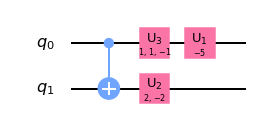

In [8]:
circ = QuantumCircuit(2)
circ.cx(0,1)
circ.u3(1,1,-1,0)
circ.u2(2,-2,1)
circ.u1(-5, 0)
circ.draw(output = 'mpl')

In [ ]:
(GateInverter(circ)).draw(output = 'mpl')

#  Inverting VQE Circuit

In [10]:
param = " 0.00180277, -0.00184986, -0.11215176"

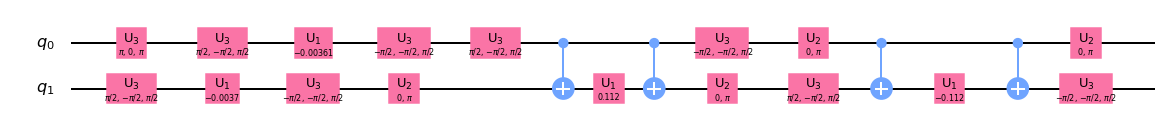

In [11]:
string = """OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\nu3(pi,0,pi) q[0];\nu3(pi/2,-pi/2,pi/2) q[0];\nu1(-0.0036055449) q[0];\nu3(-pi/2,-pi/2,pi/2) q[0];\nu3(pi/2,-pi/2,pi/2) q[0];\nu3(pi/2,-pi/2,pi/2) q[1];\nu1(-0.003699724) q[1];\nu3(-pi/2,-pi/2,pi/2) q[1];\nu2(0,pi) q[1];\ncx q[0],q[1];\nu1(0.11215176) q[1];\ncx q[0],q[1];\nu3(-pi/2,-pi/2,pi/2) q[0];\nu2(0,pi) q[0];\nu2(0,pi) q[1];\nu3(pi/2,-pi/2,pi/2) q[1];\ncx q[0],q[1];\nu1(-0.11215176) q[1];\ncx q[0],q[1];\nu2(0,pi) q[0];\nu3(-pi/2,-pi/2,pi/2) q[1];\n"""
vqe_circ = QuantumCircuit.from_qasm_str(string)
from qiskit.compiler import transpile
#basis_gates =  ['id', 'u3']
#vqe_circ = transpile(vqe_circ, basis_gates = basis_gates)
vqe_circ.draw(output = 'mpl')

Converting circ to string using Qasmstring function in Quantum Ciruit
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
u3(pi,0,pi) q[0];
u3(pi/2,-pi/2,pi/2) q[0];
u1(-0.0036055449) q[0];
u3(-pi/2,-pi/2,pi/2) q[0];
u3(pi/2,-pi/2,pi/2) q[0];
u3(pi/2,-pi/2,pi/2) q[1];
u1(-0.003699724) q[1];
u3(-pi/2,-pi/2,pi/2) q[1];
u2(0,pi) q[1];
cx q[0],q[1];
u1(0.11215176) q[1];
cx q[0],q[1];
u3(-pi/2,-pi/2,pi/2) q[0];
u2(0,pi) q[0];
u2(0,pi) q[1];
u3(pi/2,-pi/2,pi/2) q[1];
cx q[0],q[1];
u1(-0.11215176) q[1];
cx q[0],q[1];
u2(0,pi) q[0];
u3(-pi/2,-pi/2,pi/2) q[1];

------------------------------------
passing a modified qasm string to from_qasm_str method of quantum circuit
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
x q[0];
x q[1];
barrier q[0],q[1];
u3(-3.141592653589793,-0.0,-3.141592653589793) q[0];
barrier q[0],q[1];
barrier q[0],q[1];
u3(-1.5707963267948966,1.5707963267948966,-1.5707963267948966) q[0];
barrier q[0],q[1];
barrier q[0],q[1];
u1(0.0036055449) q[0];
barrier q[0],q[1];
barrier q[0],

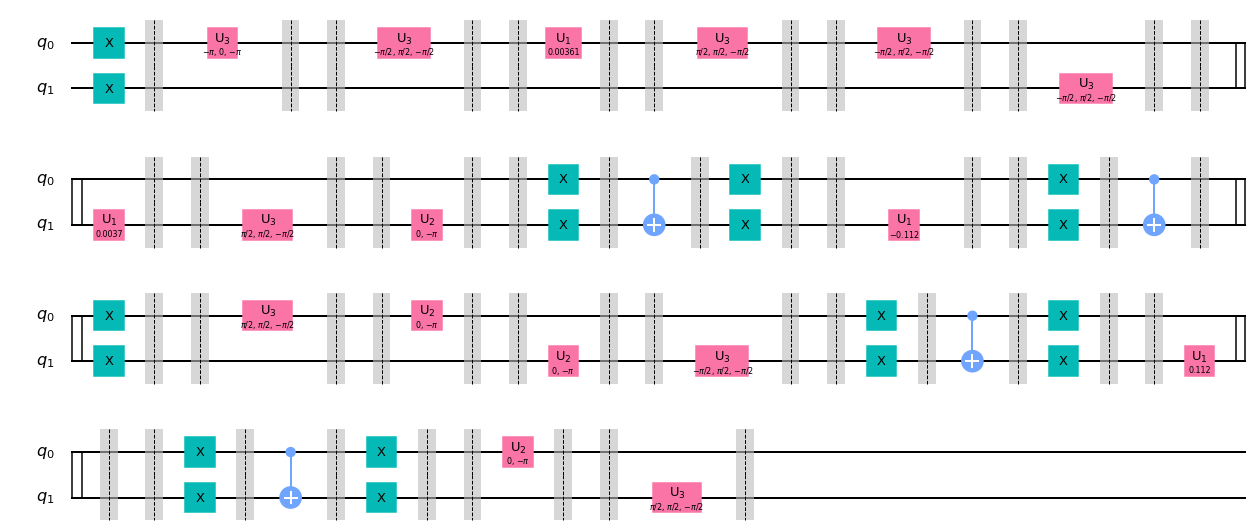

In [12]:
vqe_invert_circ = GateInverter(vqe_circ)
vqe_invert_circ.draw(output = 'mpl')

### Hammyfication

In [13]:
from qiskit import ClassicalRegister
import math

Hamiltonian = """II
IZ 
ZI
ZZ
XX"""

Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]

def Hammifier(circy):
    """
    Adding local hamiltonians to vqe circuit and returning circuits for measuring II, IZ . ZI. ZZ and other for  measuring XX
    """
    circuits = []
    for line in iter(Hamiltonian.splitlines()):
        circ = circy.copy()
        for index in range(len(line)):
            op = line[index]

            ##do nothing if Z or I
            if(op == "X"): 
                #hadamard in u3
                circ.u3(math.pi/2, 0, math.pi, index)
            elif(op == "Y"):
                circ.rx(pi/2, index)
        c = ClassicalRegister(2)
        circ.add_register(c)
        circ.measure([0], [0])
        circ.measure([1],[1])
        circuits.append(circ)
    return [circuits[0], circuits[4]]

In [14]:
less_circuits = Hammifier(vqe_circ)
inverted_less_circuits = Hammifier(vqe_invert_circ)

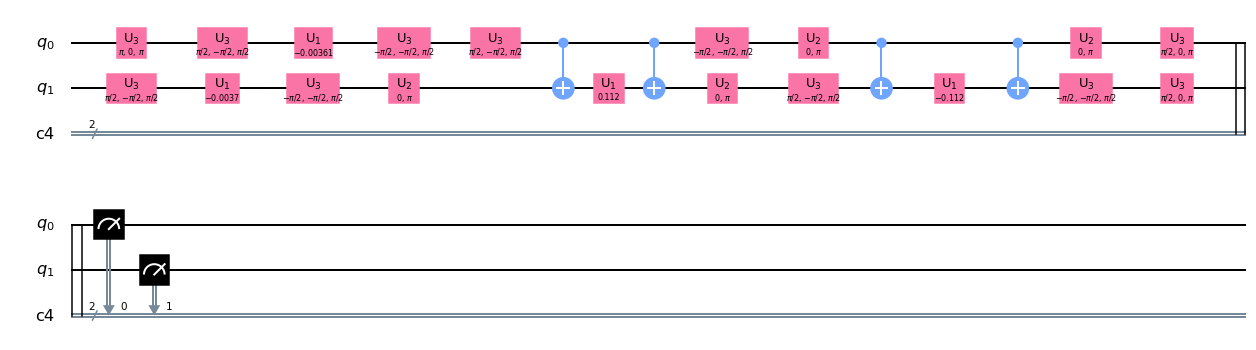

In [15]:
less_circuits[1].draw(output = 'mpl')

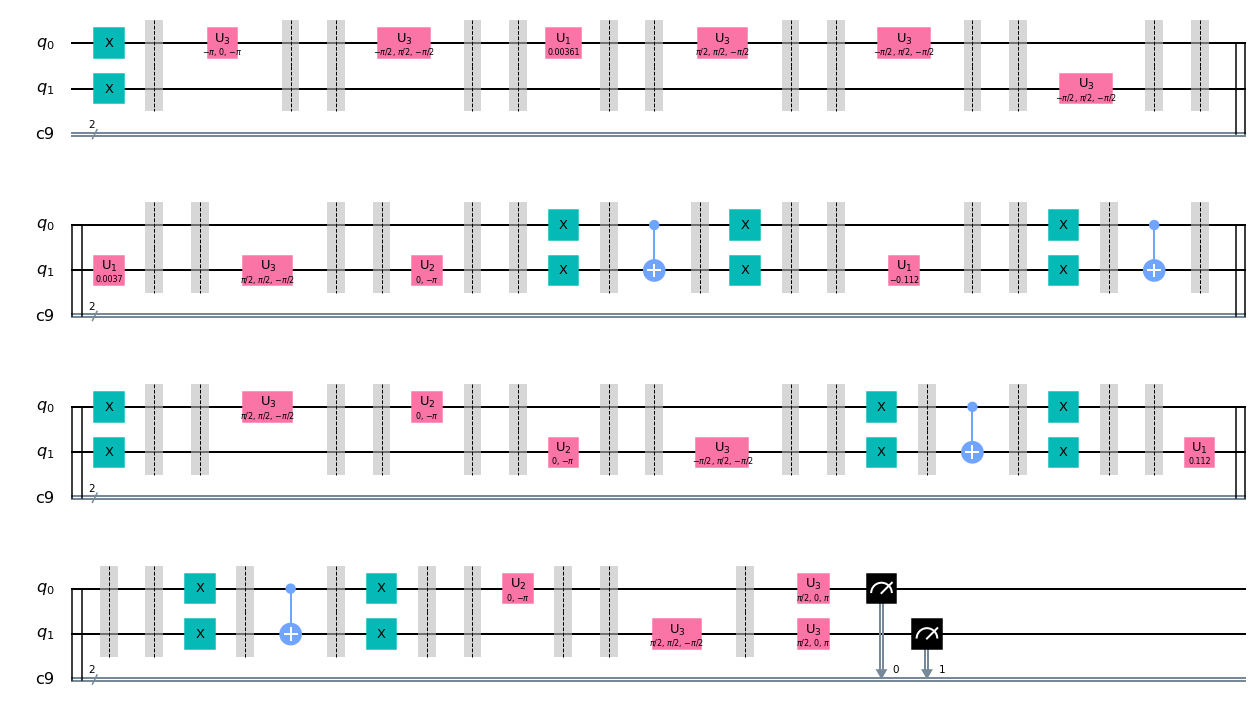

In [16]:
inverted_less_circuits[1].draw(output = 'mpl')

# Running Circuits

### Expectation Value Func

In [17]:
def binaryToDecimal(binary):  
    binary1 = binary 
    decimal, i, n = 0, 0, 0
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return decimal

In [18]:
def dictToList(dicty): 
    '''
    Converts dictionary to a list of keys appearing [frequency] number of times
    '''
    keys = dicty.keys()
    listy = []
    
    for key in keys: 
        listy += [key for i in range(dicty[key])]
    
    return listy

In [19]:
def sampleExpecVal(samp_zsis, samp_xx):
    '''
    Input: count corresponding to zz, zi, etc..., count corresponding to xx
    Output: expectation value of the sample
    '''
    
    #Hamiltonian = """II IZ ZI  ZZ XX"""
    Hamiltonian = ['ii', 'iz', 'zi', 'zz', 'xx' ]
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    Hamiltonian_eig = []
    
    for hammy in Hamiltonian: 
        if (hammy!= 'xx'): 
            Hamiltonian_eig+= [countToEig(samp_zsis, hammy)]
        else:
            Hamiltonian_eig+= [countToEig(samp_xx, hammy)]
            
    #combining eigvals of local hamiltonians 
    energy = np.dot(Hamiltonian_weights, Hamiltonian_eig)
    
    #add in the shift (nuclear repulsion energy)
    shift = 0.7151043390810812
    
    return energy + shift

In [20]:
import numpy as np
from qiskit.quantum_info import Pauli 

def countToEig(count, matrix): 
    '''
    Input: count (string), matrix (2 bit string) like XX, YY
    Output: eigval corresponding to that count
    '''
    
    #general matrices 
    x = [[0, 1],[1, 0]]
    z = [[1, 0], [0, -1]]
    i = [[1, 0],[0,1]]
    #parsing matrices
    matrices = []
    for mat in matrix: 
        if (mat== 'x'):
            matrices.append(x)
        elif(mat == 'z'):
            matrices.append(z)
        elif(mat == 'i'): 
            matrices.append(i)
        else: 
            print('Error parsing matrices')
    first = matrices[0]
    second = matrices[1]
#     print('Matrices are ')
#     print(first)
#     print(second)
    
    #computing eigenvalue of kron(first, second)
    v, w = np.linalg.eig(np.kron(first, second))
    #convert count to dec
    count = binaryToDecimal(int(count))
    return v[count]
          

In [21]:
import random

def expecValForSamples(counts_zsis, counts_xx):
    '''
    Input: counts [dict] for zz,iz, etc. , counts[dict] for xx
    Output: List of expecVal for all the samples
    '''
    
    #convert dict to list
    list_zsis = dictToList(counts_zsis)
    list_xx = dictToList(counts_xx)
    
    #extract samples from list and compute expec val
    expec_vals = []
    while(len(list_zsis)!= 0 and len(list_xx)!= 0): 
        index1 = random.randrange(0, len(list_zsis))
        index2 = random.randrange(0, len(list_xx))
        
        exp_val= sampleExpecVal(list_zsis[index1], list_xx[index2])
        expec_vals.append(exp_val)
        
        #removing those items from list 
        list_zsis.pop(index1)
        list_xx.pop(index2)
    return expec_vals

In [22]:
def addDicts(listy): 
    '''
    Input: list of dicts of counts 
    Output: combining all dicts into one dict, returning that
    '''
    keys = ['00', '11', '10', '01']
    master = {}
    
    for key in keys: 
        #initializing master at that key
        master[key] = 0
        
        #now adding up all dictys[key]
        for dicty in listy: 
            try:
                master[key] += dicty[key]
            except KeyError: 
                continue
    return master
            

In [26]:
def invertDict(temp):
    '''
    Switching data 
    for '00' -> '11', '01' -> '10', ...
    '''
    dicty = {}
    print('Original')
    print(temp)
    dicty['00'] = temp['11']
    dicty['01'] = temp['10']
    dicty['10'] = temp['01']
    dicty['11'] = temp['00']
    print('After switch')
    print(dicty)
    return dicty
    

### Running Function

In [27]:
def evaluator(circuits, samples, noise_model, invert = False):
    """
    Input: circuits, noise model to run on , weights of the local hammys
    Output: expectation value (energy)
    
    """
    
    #Running the circuits 
    results = [[] for i in range(len(circuits))]
  
    
    
    while(samples!=0):
        if (samples>8192):
            for i_circ in range(len(circuits)):
                circ = circuits[i_circ]
                job =  execute(circ, backend = simulator, noise_model = noise_model, shots = 8192)
                counts = job.result().get_counts()
                results[i_circ].append(counts)
            samples-= 8192
        else: 
            for i_circ in range(len(circuits)):
                circ = circuits[i_circ]
                job =  execute(circ, backend = simulator, noise_model = noise_model, shots = samples)
                counts = job.result().get_counts()
                results[i_circ].append(counts)
            samples = 0
    print('Running Circuits done')
    #adding up all the dicts
    counties = [addDicts(circ_results) for circ_results in results]
    if(invert):
        counties = [invertDict(dicty) for dicty in counties]
    
    print('Adding dicts done')
    #computing expectation values
    expec_vals = expecValForSamples(counties[0], counties[1])
    print('Computing expec vals done')
        
    return expec_vals

## Running Now

In [ ]:
samples = [100*i for i in range(100)]
results_ideal= []
results_noisy = []
results_ideal_invert= []
results_noisy_invert = []


for sample in samples: 
    print('------------------ Sample ' + str(sample) + ' ---------------------------')
    result_id = evaluator(less_circuits, sample, None)
    result_noi =evaluator(less_circuits, sample, machine_noise_model)
    result_id_invert = evaluator(inverted_less_circuits, sample, None, invert = True)
    result_noi_invert =evaluator(inverted_less_circuits, sample, machine_noise_model, invert = True)
    results_ideal.append(result_id)
    results_noisy.append(result_noi)
    results_ideal_invert.append(result_id_invert)
    results_noisy_invert.append(result_noi_invert)


In [46]:
def meansAndErrs(results, samples):
    '''
    Return means and errors of computed energies across samples
    '''
    means = []
    errses = []
    for i in range(len(samples)): 
        mean = np.mean(results[i])
        err = np.std(results[i])/np.sqrt(samples[i])
        means.append(mean)
        errses.append(err)
    return means, errses


In [47]:
results = [results_ideal, results_noisy, results_ideal_invert, results_noisy_invert]

meanses = []
errses = []
for result in results:
    means, errs = meansAndErrs(result, samples)
    meanses.append(means)
    errses.append(errs)

In [48]:
Labels = ['Ideal', 'Noisy', 'Ideal Inverted', 'Noisy Inverted']
colors = ['tab:blue','tab:orange', 'tab:green', 'tab:red' ]

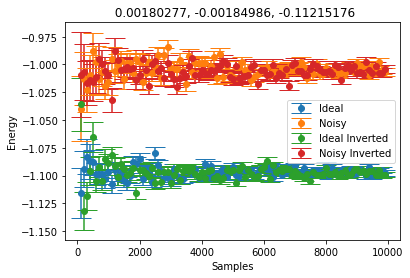

In [50]:
import matplotlib.pyplot as plt
a = plt.figure()
for i in [0, 1, 2, 3]:
    plt.errorbar(samples, meanses[i], yerr=errses[i],capsize = 10, fmt ='o', color = colors[i], label = Labels[i])
plt.xlabel('Samples')
plt.ylabel('Energy')
plt.title(param)
plt.legend()
plt.show()
#a.savefig("Sept22(1).png", dpi = 1000)

In [51]:
p1_0 = machine.properties().qubit_property(0, 'prob_meas1_prep0')[0]
p0_1 = machine.properties().qubit_property(0, 'prob_meas0_prep1')[0]
print(str(p1_0) + ' ' + str(p0_1))

0.01 0.050000000000000044


# Debugging the errors

In [52]:
def generateDepolarizingError(gate, qubits, machine = machine):
    """
    Return a depolarizing error
    """
    try:
        gate_error = machine.properties().gate_error(gate, qubits)
        error = depolarizing_error(gate_error, len(qubits))
        return error
    
    except: 
        return None
    
def generateRelaxationError(gate, qubits, t1, t2, amp = 1, custom_t = False, machine = machine):
    """
    Return a relaxation error
    """
    if len(qubits) == 1:
        try:
            if(not custom_t):
                t1 = machine.properties().t1(qubits[0])
                t2 = min(machine.properties().t2(qubits[0]), 2*t1)
                t1 = t1/amp
                t2 = t2/amp
            gate_time = machine.properties().gate_length(gate, qubits)
            error = thermal_relaxation_error(t1, t2, gate_time)
            return error
        except:
            return None
    else:
        try:
            #setting times
            
            if(custom_t):
                t1_a = t1
                t2_a = min(t2, 2*t1)
                t1_b = t1_a
                t2_b = t2_a
            else:
                t1_a = machine.properties().t1(qubits[0])
                t2_a = min(machine.properties().t2(qubits[0]), 2*t1_a)
                t1_b = machine.properties().t1(qubits[1])
                t2_b = min(machine.properties().t2(qubits[1]), 2*t1_b)
            
            t1_a = t1_a/amp
            t2_a = t2_a/amp
            t1_b = t1_b/amp
            t2_b = t2_b/amp
            #finding gate time
            time_cx = machine.properties().gate_length(gate, qubits)
            error = thermal_relaxation_error(t1_a, t2_a, time_cx).expand(thermal_relaxation_error(t1_b, t2_b, time_cx))
            return error
        except:
            return None

def generateNoiseModel(coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """
    
    #initializing noise model
    noise_thermal = NoiseModel()
    amp = 1
    
    #for every qubit (5 qubit london machine)
    for q in range(5): 
        #types of erroneous gates
        gates = [ 'u3', 'u2', 'u1', 'id']


        for gate in gates: 
            dep_error = None
            if(coherent):     
                dep_error = generateDepolarizingError(gate, [q])
            rel_error = None
            if(incoherent):
                generateRelaxationError(gate,[q], t1, t2, amp= amp, custom_t = custom_t)

            if(dep_error ==None and rel_error !=None):
                error_obj = rel_error
                noise_thermal.add_quantum_error(error_obj, gate, [q])

            elif(dep_error !=None and rel_error ==None):
                error_obj = dep_error
                noise_thermal.add_quantum_error(error_obj, gate, [q])

            elif(dep_error !=None and rel_error !=None):
                error_obj = dep_error.compose(rel_error)
                noise_thermal.add_quantum_error(error_obj, gate, [q])


        #2 qubit gate errors
        qubits = [i for i in range(5)]
        qubits.remove(q)
        for j in qubits:
            dep_error = None
            if(coherent):
                dep_error = generateDepolarizingError('cx', [q,j])
            rel_error = None
            if (incoherent):
                rel_error = generateRelaxationError('cx' ,[q,j], t1, t2, amp = amp,custom_t = custom_t)

            if(dep_error ==None and rel_error !=None):
                error_obj = rel_error
                noise_thermal.add_quantum_error(error_obj, 'cx', [q,j])

            elif(dep_error !=None and rel_error ==None):
                error_obj = dep_error
                noise_thermal.add_quantum_error(error_obj, 'cx', [q,j])

            elif(dep_error !=None and rel_error !=None):
                error_obj = dep_error.compose(rel_error)
                noise_thermal.add_quantum_error(error_obj, 'cx', [q,j])
        if (readout):
            #adding the readout error 
            p1_0 = machine.properties().qubit_property(q, 'prob_meas1_prep0')[0]
            p0_1 = machine.properties().qubit_property(q, 'prob_meas0_prep1')[0]
            
            print('Original: ' + str(p1_0) + ' ' + str(p0_1))
          
            if(reverse):
                temp = p1_0
                p1_0 = p0_1
                p0_1 = temp
            print('Reverse: ' + str(p1_0) + ' ' + str(p0_1))

            matrix = [[1-p1_0, p1_0 ], [p0_1, 1-p0_1]]
            error  = ReadoutError(matrix)

            noise_thermal.add_readout_error(error, [q])
        
    return noise_thermal
    


In [53]:
generateNoiseModel()

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u3', 'id', 'u2', 'cx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('cx', [0, 1]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [1, 3]), ('cx', [2, 1]), ('cx', [3, 1]), ('cx', [3, 4]), ('cx', [4, 3])]

### Just Readout 

In [54]:
noise_model_jreadout = generateNoiseModel( coherent = False, incoherent = False, readout= True)

Original: 0.01 0.050000000000000044
Reverse: 0.01 0.050000000000000044
Original: 0.02 0.07666666666666666
Reverse: 0.02 0.07666666666666666
Original: 0.14 0.18999999999999995
Reverse: 0.14 0.18999999999999995
Original: 0.0033333333333332993 0.03
Reverse: 0.0033333333333332993 0.03
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.006666666666666667 0.043333333333333335


In [ ]:
new_samples = samples
results_jreadout_ideal = []
results_jreadout_invert = []

for sample in new_samples: 
    print('------------------ Sample ' + str(sample) + ' ---------------------------')
    result_id = evaluator(less_circuits, sample, noise_model = noise_model_jreadout)
    result_inv = evaluator(inverted_less_circuits, sample, noise_model = noise_model_jreadout, invert = True)
    results_jreadout_ideal.append(result_id)
    results_jreadout_invert.append(result_inv)

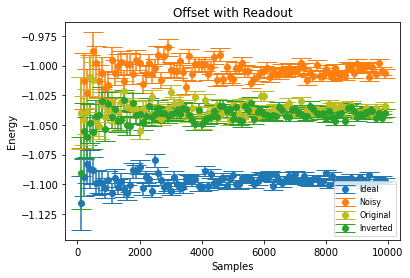

In [59]:
mean_jreadout_orig, err_jreadout_orig = meansAndErrs(results_jreadout_ideal, new_samples)
mean_jreadout_inv, err_jreadout_inv = meansAndErrs(results_jreadout_invert, new_samples)
a = plt.figure()
for i in [0, 1]:
    plt.errorbar(samples, meanses[i], yerr=errses[i],capsize = 10, fmt ='o', color = colors[i], label = Labels[i])
#plt.errorbar(new_samples, mean_co, yerr = err_co,capsize = 10, fmt ='o', color = 'tab:pink', label = 'Coherent')
#plt.errorbar(new_samples, mean_inco, yerr = err_inco,capsize = 10, fmt ='o', color = 'tab:cyan', label = 'Incoherent + Coherent')
plt.errorbar(new_samples, mean_jreadout_orig, yerr = err_jreadout_orig,capsize = 10, fmt ='o', color = 'tab:olive', label = 'Original')
plt.errorbar(new_samples, mean_jreadout_inv, yerr = err_jreadout_inv,capsize = 10, fmt ='o', color = 'tab:green', label = 'Inverted')
plt.xlabel('Samples')
plt.ylabel('Energy')
plt.title("Offset with Readout")
plt.legend(fontsize=8) # using a size in points
plt.show()
#a.savefig("Sept22(4).png", dpi = 1000)

### Reverse Readout

In [105]:
noise_model_rreadout = generateNoiseModel( coherent = False, incoherent = False, readout= True, reverse = True)


Original: 0.01 0.050000000000000044
Reverse: 0.050000000000000044 0.01
Original: 0.02 0.07666666666666666
Reverse: 0.07666666666666666 0.02
Original: 0.14 0.18999999999999995
Reverse: 0.18999999999999995 0.14
Original: 0.0033333333333332993 0.03
Reverse: 0.03 0.0033333333333332993
Original: 0.006666666666666667 0.043333333333333335
Reverse: 0.043333333333333335 0.006666666666666667


In [ ]:
new_samples = samples[:20]
results_rreadout = []

for sample in new_samples: 
    print('------------------ Sample ' + str(sample) + ' ---------------------------')
    result_id = evaluator(less_circuits, sample, noise_model = noise_model_rreadout)
    results_rreadout.append(result_id)

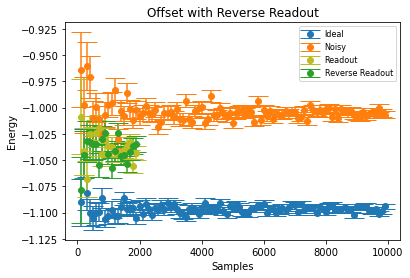

In [107]:
mean_rreadout, err_rreadout = meansAndErrs(results_rreadout, new_samples)
a = plt.figure()
for i in [0, 1]:
    plt.errorbar(samples, meanses[i], yerr=errses[i],capsize = 10, fmt ='o', color = colors[i], label = Labels[i])
#plt.errorbar(new_samples, mean_co, yerr = err_co,capsize = 10, fmt ='o', color = 'tab:pink', label = 'Coherent')
#plt.errorbar(new_samples, mean_inco, yerr = err_inco,capsize = 10, fmt ='o', color = 'tab:cyan', label = 'Incoherent + Coherent')
plt.errorbar(new_samples, mean_jreadout, yerr = err_jreadout,capsize = 10, fmt ='o', color = 'tab:olive', label = 'Readout')
plt.errorbar(new_samples, mean_rreadout, yerr = err_rreadout,capsize = 10, fmt ='o', color = 'tab:green', label = 'Reverse Readout')
plt.xlabel('Samples')
plt.ylabel('Energy')
plt.title("Offset with Reverse Readout")
plt.legend(fontsize=8) # using a size in points
plt.show()
a.savefig("Sept22(5).png", dpi = 1000)

# Just Thermal

In [87]:
noise_model_jinco = generateNoiseModel( coherent = False, incoherent = True, readout=False, reverse = False)

In [ ]:
new_samples = samples
results_jinco = []

for sample in new_samples: 
    print('------------------ Sample ' + str(sample) + ' ---------------------------')
    result_id = evaluator(less_circuits, sample, noise_model = noise_model_jinco)
    results_jinco.append(result_id)

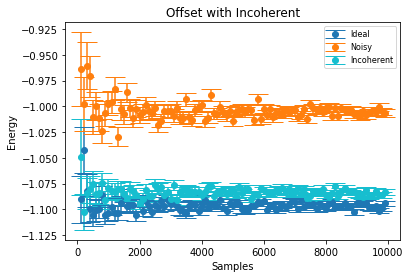

In [96]:
mean_jinco, err_jinco = meansAndErrs(results_jinco, new_samples)
a = plt.figure()
for i in [0, 1]:
    plt.errorbar(samples, meanses[i], yerr=errses[i],capsize = 10, fmt ='o', color = colors[i], label = Labels[i])
#plt.errorbar(new_samples, mean_co, yerr = err_co,capsize = 10, fmt ='o', color = 'tab:pink', label = 'Coherent')
#plt.errorbar(new_samples, mean_inco, yerr = err_inco,capsize = 10, fmt ='o', color = 'tab:cyan', label = 'Incoherent + Coherent')
plt.errorbar(new_samples, mean_jinco, yerr = err_jinco,capsize = 10, fmt ='o', color = 'tab:cyan', label = 'Incoherent')
#plt.errorbar(new_samples, mean_rreadout, yerr = err_rreadout,capsize = 10, fmt ='o', color = 'tab:green', label = 'Reverse Readout')
plt.xlabel('Samples')
plt.ylabel('Energy')
plt.title("Offset with Incoherent")
plt.legend(fontsize=8) # using a size in points
plt.show()
a.savefig("Sept22(6).png", dpi = 1000)

# Inverted Thermal

In [ ]:
#new_samples = samples[:40]
results_jiinco = []

for sample in new_samples: 
    print('------------------ Sample ' + str(sample) + ' ---------------------------')
    result_id = evaluator(inverted_less_circuits, sample, noise_model = noise_model_jinco)
    results_jiinco.append(result_id)

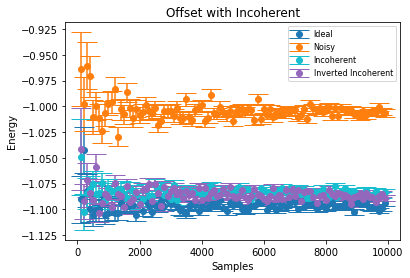

In [98]:
mean_jiinco, err_jiinco = meansAndErrs(results_jiinco, new_samples)
a = plt.figure()
for i in [0, 1]:
    plt.errorbar(samples, meanses[i], yerr=errses[i],capsize = 10, fmt ='o', color = colors[i], label = Labels[i])
#plt.errorbar(new_samples, mean_co, yerr = err_co,capsize = 10, fmt ='o', color = 'tab:pink', label = 'Coherent')
#plt.errorbar(new_samples, mean_inco, yerr = err_inco,capsize = 10, fmt ='o', color = 'tab:cyan', label = 'Incoherent + Coherent')
plt.errorbar(new_samples, mean_jinco, yerr = err_jinco,capsize = 10, fmt ='o', color = 'tab:cyan', label = 'Incoherent')
plt.errorbar(new_samples, mean_jiinco, yerr = err_jiinco,capsize = 10, fmt ='o', color = 'tab:purple', label = 'Inverted Incoherent')
#plt.errorbar(new_samples, mean_rreadout, yerr = err_rreadout,capsize = 10, fmt ='o', color = 'tab:green', label = 'Reverse Readout')
plt.xlabel('Samples')
plt.ylabel('Energy')
plt.title("Offset with Incoherent")
plt.legend(fontsize=8) # using a size in points
plt.show()
a.savefig("Sept22(7).png", dpi = 1000)